<a href="https://colab.research.google.com/github/tsinatkassu/Robot-forward-Kinematics/blob/main/robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
import numpy as np 
import pandas as pd
import math

In [ ]:
df = pd.read_csv("/content/robot_inverse_kinematics_dataset.csv")
df.shape
df.head()

,q1,q2,q3,q4,q5,q6,x,y,z
0,-1.51,-0.763,1.85,-0.817,0.9120,2.320,-0.0947,0.1500,0.301
1,-2.84,0.520,1.58,-1.270,-1.3900,0.617,0.1420,-0.1000,0.225
2,-1.23,0.695,1.22,-1.130,0.0343,6.270,-0.0833,0.2230,0.206
3,-1.99,1.060,1.74,-1.760,-1.2400,4.760,0.1350,-0.0314,0.370
4,1.05,0.836,1.34,-1.890,0.4840,4.380,-0.0560,-0.2290,0.260


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


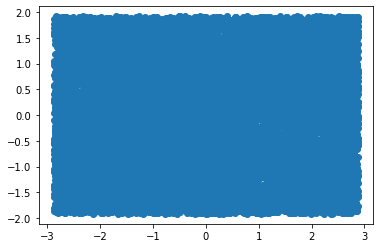

In [ ]:
plt.scatter(df['q1'],df['q2'])

In [ ]:
X = df[['q1','q2','q3']]

In [ ]:
y = df[['q4','q5','q6']]

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#len(X_train)

In [ ]:
len(X_train)

12000

In [ ]:
X_test

,q1,q2,q3
6507,0.825,-0.3930,1.27
1858,-0.439,-0.0186,1.88
6766,1.420,-1.5500,1.24
8965,2.590,-0.9760,1.70
241,0.865,1.1800,1.52
...,...,...,...
9366,0.417,1.6900,1.55
10807,2.220,0.2990,1.74
5699,1.230,0.4960,1.80
6447,2.360,-0.7380,1.24


In [ ]:
len(X_test)

3000

In [ ]:
len(y_train)

12000

In [ ]:
len(y_test)

3000

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

,q1,q2,q3
6507,0.825,-0.3930,1.27
1858,-0.439,-0.0186,1.88
6766,1.420,-1.5500,1.24
8965,2.590,-0.9760,1.70
241,0.865,1.1800,1.52
...,...,...,...
9366,0.417,1.6900,1.55
10807,2.220,0.2990,1.74
5699,1.230,0.4960,1.80
6447,2.360,-0.7380,1.24


In [ ]:
clf.predict(X_test)

array([[ 0.02874308,  0.02558967,  3.06627456],
       [ 0.0053792 , -0.01927075,  3.17564096],
       [ 0.04659547,  0.04182263,  3.01923702],
       ...,
       [-0.00911416, -0.0039196 ,  3.15098757],
       [ 0.02774508,  0.04407951,  3.02583764],
       [ 0.03162601, -0.01810896,  3.15900596]])

In [ ]:
y_test

,q4,q5,q6
6507,0.4230,1.2100,4.510
1858,-0.2020,1.4500,5.880
6766,0.4340,1.8200,5.070
8965,-0.0698,0.0968,5.900
241,-2.7600,0.3020,6.120
...,...,...,...
9366,2.5900,0.4180,6.240
10807,0.3940,0.7110,2.990
5699,-1.4300,-1.4800,3.150
6447,-0.7050,-0.9710,0.563


In [ ]:
y_test

,q4,q5,q6
6507,0.4230,1.2100,4.510
1858,-0.2020,1.4500,5.880
6766,0.4340,1.8200,5.070
8965,-0.0698,0.0968,5.900
241,-2.7600,0.3020,6.120
...,...,...,...
9366,2.5900,0.4180,6.240
10807,0.3940,0.7110,2.990
5699,-1.4300,-1.4800,3.150
6447,-0.7050,-0.9710,0.563


In [ ]:
clf.score(X_test, y_test)

-0.0016414744969871127

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=3,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
history =ann.fit(X_train,y_train,batch_size=32,epochs =100)

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: -1.9518 - accuracy: 0.8242
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: -26.9151 - accuracy: 0.8366
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: -124.4512 - accuracy: 0.8366
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: -330.0571 - accuracy: 0.8366
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: -663.8579 - accuracy: 0.8366
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: -1141.6041 - accuracy: 0.8366
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: -1775.0093 - accuracy: 0.8366
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: -2572.8625 - accuracy: 0.8366
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: -3544.0403 - accuracy: 0.8366
Epoch 10/100
375/375 [==============================] - 1s 2ms/

In [ ]:
history.history

{'accuracy': [0.8242499828338623,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414,
  0.8365833163261414

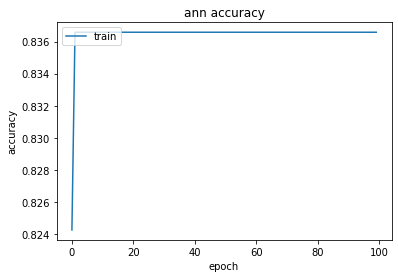

In [ ]:
plt.plot(history.history['accuracy'])

plt.title('ann accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

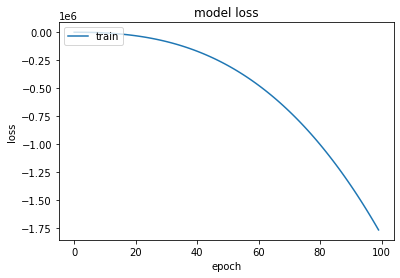

In [ ]:
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
ann.save("ANN.h5")